In [28]:
install.packages("twitteR", repos='http://cran.us.r-project.org') 
install.packages("ggmap", repos='http://cran.us.r-project.org')
install.packages("data.table", repos='http://cran.us.r-project.org')
#downloading requires packages

Warning message:
"package 'twitteR' is in use and will not be installed"Warning message:
"package 'ggmap' is in use and will not be installed"Warning message:
"package 'data.table' is in use and will not be installed"

In [29]:
library("twitteR")
library("ggmap")
library("data.table")
#Importing required libraries 

In [30]:
setup_twitter_oauth("yGySPv3QvOVQD5LRVeQ86hSbG","nUNRGKX1TP8YVsnybykDkYQarts8i9Aet4lwtyPtZodCjOXi3c","226464102-g9LmZDbiNKiV9c5EXn9oclmDPtgqMxawoWH7v6Kg","IZVcv4nBs94XaCS5S9fnWYNwKQ7j5zRA1ZaykBJjz4b9y")
#Setting up Twitter Authentication

[1] "Using direct authentication"


In [33]:
input<-"#sundarpichai"
topic<-searchTwitter(input,n=1000)
#Enter the topic to be searched above in the place of #sundarpichai

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"1000 tweets were requested but the API can only return 383"

In [34]:
dataframe<-twListToDF(topic)
#Converting the crawled tweets into a dataframe

In [35]:
users<-lookupUsers(dataframe$screenName) #searching for user data from screenname in the user data frame
usersdataframe<-twListToDF(users)  #Storing the user data into a data frame
userlocation<-usersdataframe$location  #Getting the location of the user from the user dataframe

In [36]:
gc<-geocode(userlocation) #getting the geocode of the userlocation

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Abidjan,%20C%C3%B4te%20d'Ivoire&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Surat,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bangalore&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hyderabad,%20India&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=YYC%20%7C%20YVR%20%7C%20YEG%20%7C%20YYZ%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20England&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=INDIA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Coimbatore,%20India&sensor=

In [37]:
gcna<-na.omit(gc) #removing all the null values from the obtained geocode

In [38]:
gcgroup<-data.table(gcna)[, .N, by=.(lon,lat)]#Grouping the obtained geocode based on their lat lon values by using data.table

In [39]:
head(gcgroup)

lon        lat       N 
1  -4.008256  5.359952  1
2  72.831061 21.170240  1
3  78.962880 20.593684 26
4  77.594563 12.971599 14
5  78.486671 17.385044 11
6 -79.624820 43.677718  1

In [40]:
usmap<-get_map(location="United States",zoom=4) #Getting United States map using the get_map() function

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=United+States&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false


In [ ]:
ggmap(usmap)+geom_point(data=gcgroup,aes(x=gcgroup$lon,y=gcgroup$lat),size=gcgroup$N/2,col="blue") #Now plotting the grouped lat long coordinates using ggmap() and geom_point() function

Second Part retrieving tweets from csv file


In [42]:
gcarrow1<-read.csv(file="gcarrloc1.csv") #reading the geocodes of two csv files each 2500 values  
gcarrow2<-read.csv(file="gca2l.csv")

In [43]:
gcarrow<-rbind(gcarrow1,gcarrow2) #Binding the two variables into a single variable now this contains 5000 values
dim(gcarrow) #Printing the dimensions using dim() function

[1] 5000    3

In [44]:
gcarr<-na.omit(gcarrow) #Now removing all the NA values from the obtained geocodes by using NA.omit() function

In [45]:
gcarrgroup<-data.table(gcarr)[, .N, by=.(lon,lat)] #Grouping the obtained geocode based on their lat lon values by using data.table

In [46]:
gcarrgroupn<-gcarrgroup[order(-N),]
gcarrgroupnr<-gcarrgroupn[-c(1,2),]

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=United+States&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
"Removed 510 rows containing missing values (geom_point)."

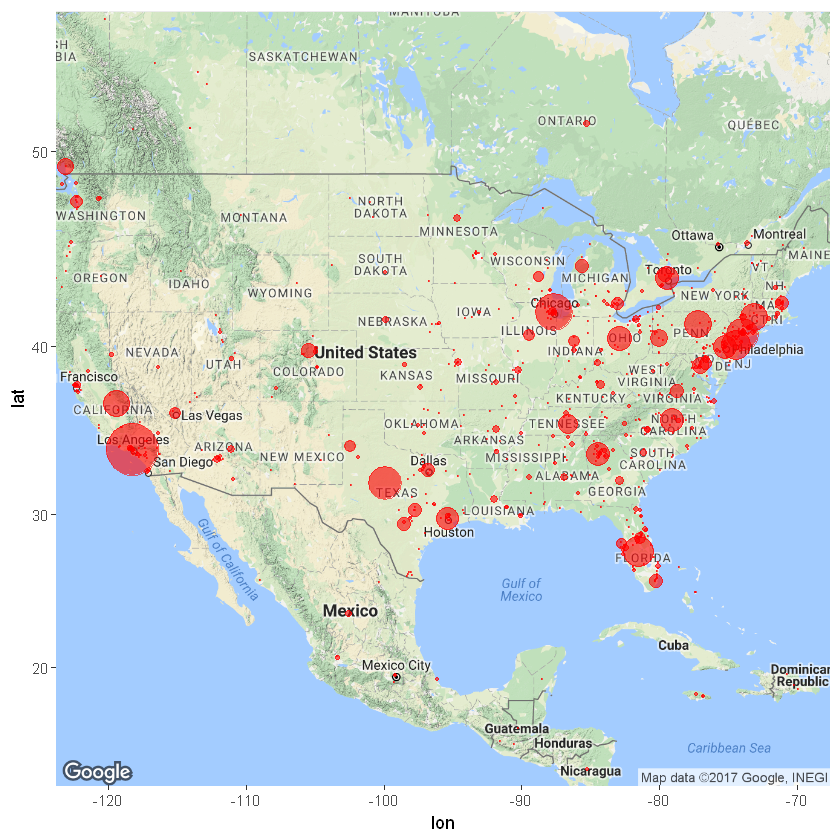

In [48]:
usmap<-get_map(location="United States",zoom=4) #Getting the United States Map by using get_map 
ggmap(usmap)+geom_point(data=gcarrgroupnr,aes(x=gcarrgroupnr$lon,y=gcarrgroupnr$lat),size=gcarrgroupnr$N/3,col="red",alpha=0.6) #Now plotting the grouped lat long coordinates using ggmap() and geom_point() functions